In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
ROOT_PATH = '..'
DATA_PATH = ROOT_PATH + '/data/'

In [8]:
transactions = pd.read_csv(DATA_PATH + 'transactions_dataset.csv', sep=';')
print(transactions.shape)
transactions.head(10)

(63319315, 8)


,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
5,2017-09-25,2017-09-25,793319,564878,116.70384,11,by phone,35
6,2017-09-25,2017-09-25,745693,482822,1.44900,5,by phone,2771
7,2017-09-25,2017-09-25,2818980,1883627,15.27660,9,at the store,5579
8,2017-09-25,2017-09-25,683924,224223,12.03360,3,at the store,9463
9,2017-09-25,2017-09-25,738406,434261,22.52712,21,at the store,3416


In [12]:
transactions['date_order'] = pd.to_datetime(transactions['date_order'], format='%Y-%m-%d')
transactions['date_invoice'] = pd.to_datetime(transactions['date_invoice'], format='%Y-%m-%d')

In [19]:
transactions.describe(include='all', datetime_is_numeric=True)

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
count,63319315,63319314,6.331932e+07,6.331932e+07,6.331932e+07,6.331932e+07,63319315,6.331932e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,at the store,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,32114196,NaN
mean,2018-09-21 04:04:39.664808448,2018-09-26 05:22:19.385416448,1.632321e+06,1.139833e+06,1.479416e+02,9.215658e+01,NaN,5.466714e+03
min,2017-09-22 00:00:00,2016-10-12 00:00:00,1.500000e+01,6.000000e+00,-1.738817e+06,3.000000e+00,NaN,2.000000e+01
25%,2018-03-19 00:00:00,2018-03-22 00:00:00,8.517370e+05,5.658470e+05,1.414653e+01,3.000000e+00,NaN,2.907000e+03
50%,2018-09-21 00:00:00,2018-09-27 00:00:00,1.621731e+06,1.152241e+06,4.424280e+01,5.000000e+00,NaN,5.226000e+03
75%,2019-03-21 00:00:00,2019-03-26 00:00:00,2.434262e+06,1.706977e+06,1.314680e+02,2.100000e+01,NaN,8.361000e+03
max,2019-09-22 00:00:00,2021-07-13 00:00:00,3.238833e+06,2.274517e+06,1.740456e+06,1.980010e+05,NaN,1.105700e+04


In [21]:
transactions.isna().sum()

date_order       0
date_invoice     1
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64

In [22]:
transactions.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id'],
      dtype='object')

In [31]:
sales_by_day = transactions[['date_order', 'sales_net', 'quantity']].groupby('date_order').sum()
sales_by_day.reset_index(inplace=True)
sales_by_day

,date_order,sales_net,quantity
0,2017-09-22,4.748364e+03,570
1,2017-09-23,3.761597e+04,9544
2,2017-09-24,5.712976e+04,22644
3,2017-09-25,1.749303e+07,10714195
4,2017-09-26,1.815024e+07,11371242
...,...,...,...
726,2019-09-18,9.565972e+06,5881484
727,2019-09-19,1.014737e+07,5021328
728,2019-09-20,7.547261e+06,3562304
729,2019-09-21,5.842836e+04,27032


In [34]:
sales_by_week = sales_by_day.copy()
sales_by_week['week_order'] = sales_by_week['date_order'] - sales_by_day['date_order'].dt.weekday * np.timedelta64(1, 'D')
sales_by_week.drop(columns=['date_order'])
sales_by_week = sales_by_week.groupby("week_order").sum()
sales_by_week

,sales_net,quantity
week_order,,
2017-09-18,9.949410e+04,32758
2017-09-25,8.858272e+07,55951330
2017-10-02,9.576884e+07,60006547
2017-10-09,9.580276e+07,76547731
2017-10-16,9.280616e+07,72602845
...,...,...
2019-08-19,1.131323e+08,64833948
2019-08-26,1.082565e+08,59752122
2019-09-02,1.012958e+08,55659183


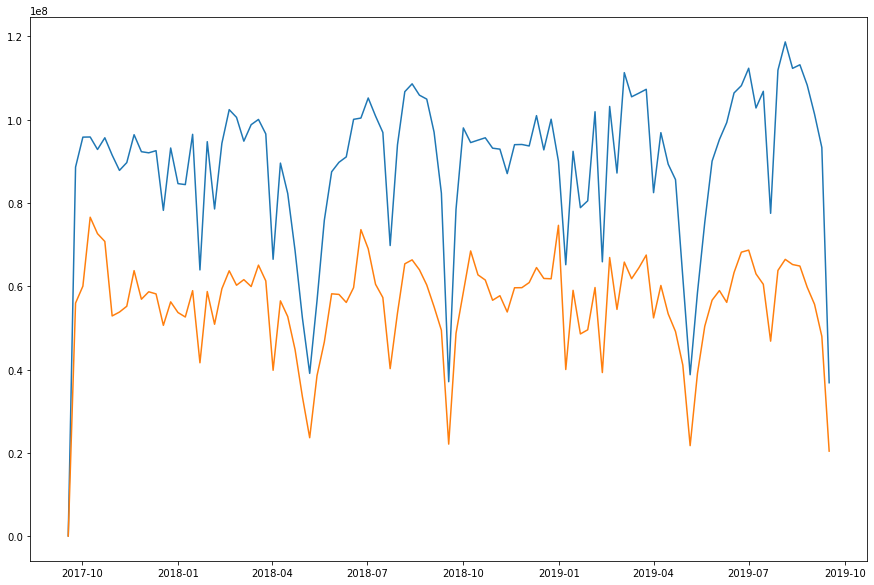

In [43]:
plt.figure(facecolor='white', figsize=(15,10))
plt.plot(sales_by_week.sales_net)
plt.plot(sales_by_week.quantity)
plt.show()